# 8.4 Распознавание цифр (MNIST)

In [1]:
import torch

In [2]:
from setup_libs import *

import torchvision

from torch import nn, optim

from torch.nn import Sequential, Linear, LogSoftmax, Sigmoid, Flatten, Softmax, ReLU

from torchvision import datasets, transforms

from torch.utils.data import random_split, DataLoader

## Картинки!

In [12]:
batch_size = 32

In [3]:
train_data = datasets.MNIST('data', train=True, download=True, transform=transforms.ToTensor())

train, val = random_split(train_data, [55000, 5000])
train_loader = DataLoader(train, batch_size=32)
val_loader = DataLoader(val, batch_size=32)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


In [16]:
val[4][0].size()

torch.Size([1, 28, 28])

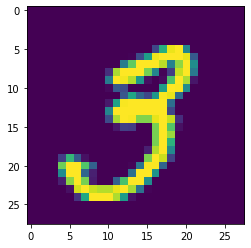

In [6]:
plt.imshow(val[4][0].reshape(28,28).numpy())
plt.show()

In [17]:
model = Sequential(
    Linear(28 * 28, 64), # на входе - размеры картинки
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 10) # 10 классов
)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for epoch in range(4):
    
    # training part
    train_losses = list()
    train_count_correct = 0 
    for batch in train_loader: # 55000 / 32 раз
        x, y = batch
        # x: batch_size x 1 x 28 x 28
        # y: batch_size x 1
        
        x = x.view(x.size(0), -1) # matrix of vectors batch_size x (28 * 28)
        
        y_pred = model(x)
        
        batch_loss = criterion(y_pred, y)
        
        train_losses.append(batch_loss.item())
        train_count_correct += (y_pred.argmax(-1) == y).sum().item()
        
        
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch + 1}, Train Loss: {torch.tensor(train_losses).mean()}, Accuracy: {train_count_correct / len(train)}')


Epoch: 1, Train Loss: 1.282459020614624, Accuracy: 0.6433818181818182
Epoch: 2, Train Loss: 0.40966710448265076, Accuracy: 0.8857454545454545
Epoch: 3, Train Loss: 0.3284823000431061, Accuracy: 0.9058181818181819
Epoch: 4, Train Loss: 0.2911454141139984, Accuracy: 0.916


## Check model

In [18]:
val_losses = list()
val_count_correct = 0
for batch in val_loader:
    x, y = batch
    x = x.view(x.size(0), -1)

    with torch.no_grad():
        y_pred = model(x) 

    batch_loss = criterion(y_pred, y)
    val_losses.append(batch_loss.item())
    val_count_correct += (y_pred.argmax(-1) == y).sum().item()

print(f'Test Loss: {torch.tensor(val_losses).mean()}, Test Accuracy: {val_count_correct / len(val)}')

Test Loss: 0.26562535762786865, Test Accuracy: 0.927


## Обычно делают одновременно

In [19]:
model = Sequential(
    Linear(28 * 28, 64), # на входе - размеры картинки
    ReLU(),
    Linear(64, 64),
    ReLU(),
    Linear(64, 10) # 10 классов
)

criterion = torch.nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)

# Спуск
for epoch in range(4):
    
    # training part
    train_losses = list()
    train_count_correct = 0 
    for batch in train_loader:
        x, y = batch
        # x: batch_size x 1 x 28 x 28
        # y: batch_size x 1
        
        x = x.view(x.size(0), -1)
        
        y_pred = model(x) 
        
        batch_loss = criterion(y_pred, y)
        train_losses.append(batch_loss.item())
        train_count_correct += (y_pred.argmax(-1) == y).sum().item()
        
        
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()
    
    print(f'Epoch: {epoch + 1}, Train Loss: {torch.tensor(train_losses).mean()}, Accuracy: {train_count_correct / len(train)}')
    
    # validation part
    val_losses = list()
    val_count_correct = 0
    for batch in val_loader:
        x, y = batch
        x = x.view(x.size(0), -1)
        
        with torch.no_grad():
            y_pred = model(x) 
        
        batch_loss = criterion(y_pred, y)
        val_losses.append(batch_loss.item())
        val_count_correct += (y_pred.argmax(-1) == y).sum().item()

    
    print(f'Epoch: {epoch + 1}, Test Loss: {torch.tensor(val_losses).mean()}, Accuracy: {val_count_correct / len(val)}')
    print('------------------------------------')


Epoch: 1, Train Loss: 1.233386516571045, Accuracy: 0.6926363636363636
Epoch: 1, Test Loss: 0.46132636070251465, Accuracy: 0.876
------------------------------------
Epoch: 2, Train Loss: 0.3943548798561096, Accuracy: 0.8870727272727272
Epoch: 2, Test Loss: 0.33445364236831665, Accuracy: 0.9086
------------------------------------
Epoch: 3, Train Loss: 0.32195091247558594, Accuracy: 0.9070909090909091
Epoch: 3, Test Loss: 0.29008355736732483, Accuracy: 0.922
------------------------------------
Epoch: 4, Train Loss: 0.285113662481308, Accuracy: 0.9181454545454546
Epoch: 4, Test Loss: 0.26203563809394836, Accuracy: 0.9294
------------------------------------


# Ссылки интересные
* [MNIST solution](https://www.youtube.com/watch?v=OMDn66kM9Qc)